In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Make graphs look nice
plt.style.use('seaborn-v0_8-whitegrid')

In [8]:
df1 = pd.read_csv("../../../Resources/Raw_Files/YFINANCE/QQQ_1d_data.csv")

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1507 non-null   object 
 1   Open           1507 non-null   float64
 2   High           1507 non-null   float64
 3   Low            1507 non-null   float64
 4   Close          1507 non-null   float64
 5   Volume         1507 non-null   int64  
 6   Dividends      1507 non-null   float64
 7   Stock Splits   1507 non-null   float64
 8   Capital Gains  1507 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 106.1+ KB


In [10]:
df1.shape, df1.head()

((1507, 9),
          Date        Open        High         Low       Close    Volume  \
 0  2020-01-02  206.881876  208.580170  206.476606  208.580170  30969400   
 1  2020-01-03  205.820515  207.914421  205.801212  206.669647  27518900   
 2  2020-01-06  205.048539  208.030183  204.797662  208.001236  21655300   
 3  2020-01-07  208.078449  208.560916  207.316157  207.972305  22139300   
 4  2020-01-08  207.943371  210.490798  207.615297  209.535507  26397300   
 
    Dividends  Stock Splits  Capital Gains  
 0        0.0           0.0            0.0  
 1        0.0           0.0            0.0  
 2        0.0           0.0            0.0  
 3        0.0           0.0            0.0  
 4        0.0           0.0            0.0  )

In [11]:
df2 = pd.read_csv(r"../../../Resources\Raw_Files\FRED\fred_macro_data.csv")

In [12]:
df2.info(), df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date                                       2190 non-null   object 
 1   GDP                                        2190 non-null   float64
 2   CPI_Inflation                              2190 non-null   float64
 3   Average_price_of_eggs                      2190 non-null   float64
 4   Average_price_of_electricity               2190 non-null   float64
 5   Leading_Index_for_US                       2190 non-null   float64
 6   NBER_Recession_Indicator                   2190 non-null   float64
 7   Producer_Price_Index                       2190 non-null   float64
 8   5-Year_Breakeven_Inflation                 2190 non-null   float64
 9   Natural_Rate__of_Unemployment_(est.)       2190 non-null   float64
 10  Civilian_Labor_Force_Par

(None,
          Date        GDP  CPI_Inflation  Average_price_of_eggs  \
 0  2020-01-03  21751.238        259.127                  1.461   
 1  2020-01-04  21751.238        259.127                  1.461   
 2  2020-01-05  21751.238        259.127                  1.461   
 3  2020-01-06  21751.238        259.127                  1.461   
 4  2020-01-07  21751.238        259.127                  1.461   
 
    Average_price_of_electricity  Leading_Index_for_US  \
 0                         0.134                  1.57   
 1                         0.134                  1.57   
 2                         0.134                  1.57   
 3                         0.134                  1.57   
 4                         0.134                  1.57   
 
    NBER_Recession_Indicator  Producer_Price_Index  5-Year_Breakeven_Inflation  \
 0                       0.0                 199.3                        1.85   
 1                       0.0                 199.3                        1

In [13]:
merged = df2.merge(df1, on="Date", how="inner")  

In [14]:
merged.shape, merged.head()

((1506, 55),
          Date        GDP  CPI_Inflation  Average_price_of_eggs  \
 0  2020-01-03  21751.238        259.127                  1.461   
 1  2020-01-06  21751.238        259.127                  1.461   
 2  2020-01-07  21751.238        259.127                  1.461   
 3  2020-01-08  21751.238        259.127                  1.461   
 4  2020-01-09  21751.238        259.127                  1.461   
 
    Average_price_of_electricity  Leading_Index_for_US  \
 0                         0.134                  1.57   
 1                         0.134                  1.57   
 2                         0.134                  1.57   
 3                         0.134                  1.57   
 4                         0.134                  1.57   
 
    NBER_Recession_Indicator  Producer_Price_Index  5-Year_Breakeven_Inflation  \
 0                       0.0                 199.3                        1.85   
 1                       0.0                 199.3                   

In [15]:
merged.shape, merged.head()

((1506, 55),
          Date        GDP  CPI_Inflation  Average_price_of_eggs  \
 0  2020-01-03  21751.238        259.127                  1.461   
 1  2020-01-06  21751.238        259.127                  1.461   
 2  2020-01-07  21751.238        259.127                  1.461   
 3  2020-01-08  21751.238        259.127                  1.461   
 4  2020-01-09  21751.238        259.127                  1.461   
 
    Average_price_of_electricity  Leading_Index_for_US  \
 0                         0.134                  1.57   
 1                         0.134                  1.57   
 2                         0.134                  1.57   
 3                         0.134                  1.57   
 4                         0.134                  1.57   
 
    NBER_Recession_Indicator  Producer_Price_Index  5-Year_Breakeven_Inflation  \
 0                       0.0                 199.3                        1.85   
 1                       0.0                 199.3                   

In [16]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date                                       1506 non-null   object 
 1   GDP                                        1506 non-null   float64
 2   CPI_Inflation                              1506 non-null   float64
 3   Average_price_of_eggs                      1506 non-null   float64
 4   Average_price_of_electricity               1506 non-null   float64
 5   Leading_Index_for_US                       1506 non-null   float64
 6   NBER_Recession_Indicator                   1506 non-null   float64
 7   Producer_Price_Index                       1506 non-null   float64
 8   5-Year_Breakeven_Inflation                 1506 non-null   float64
 9   Natural_Rate__of_Unemployment_(est.)       1506 non-null   float64
 10  Civilian_Labor_Force_Par

In [17]:
drop_list = ['Date','Open', 'High', 'Low']

In [18]:
merged = merged.drop(drop_list,axis=1)

In [19]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 51 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   GDP                                        1506 non-null   float64
 1   CPI_Inflation                              1506 non-null   float64
 2   Average_price_of_eggs                      1506 non-null   float64
 3   Average_price_of_electricity               1506 non-null   float64
 4   Leading_Index_for_US                       1506 non-null   float64
 5   NBER_Recession_Indicator                   1506 non-null   float64
 6   Producer_Price_Index                       1506 non-null   float64
 7   5-Year_Breakeven_Inflation                 1506 non-null   float64
 8   Natural_Rate__of_Unemployment_(est.)       1506 non-null   float64
 9   Civilian_Labor_Force_Participation         1506 non-null   float64
 10  BBB_Corporate_Spread    

In [20]:
merged = merged.fillna(0)

In [21]:
df3 = merged.copy()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                    df3.drop(['Close'],axis=1),
                                    df3['Close'],
                                    test_size=0.2,
                                    random_state=101
                                    )

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:", X_test.shape, y_test.shape)

* Train set: (1204, 50) (1204,) 
* Test set: (302, 50) (302,)


In [23]:
from sklearn.pipeline import Pipeline

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
#from sklearn.ensemble import AdaBoostRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.tree import DecisionTreeRegressor

def pipeline_adaboost_reg():
  pipeline = Pipeline([
      ( "feat_scaling",StandardScaler() ),
      ( "feat_selection",SelectFromModel(RandomForestRegressor(random_state=101)) ),
      ( "model", RandomForestRegressor(random_state=101)),

    ])

  return pipeline

In [24]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html  # documentation is here
param_grid = {"model__n_estimators":[10,20],
              }

param_grid

{'model__n_estimators': [10, 20]}

In [25]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=pipeline_adaboost_reg(),
                    param_grid=param_grid,
                    cv=2,
                    n_jobs=-2,
                    verbose=3,  # for learning, we set 3 to print the score from every cross-validation
                    scoring='r2')


grid.fit(X_train,y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('feat_scaling', StandardScaler()),
                                       ('feat_selection',
                                        SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                                       ('model',
                                        RandomForestRegressor(random_state=101))]),
             n_jobs=-2, param_grid={'model__n_estimators': [10, 20]},
             scoring='r2', verbose=3)

In [26]:
grid.cv_results_

{'mean_fit_time': array([1.13437152, 1.14814126]),
 'std_fit_time': array([0.0041306 , 0.00814044]),
 'mean_score_time': array([0.02493143, 0.02820206]),
 'std_score_time': array([0.00221682, 0.00175619]),
 'param_model__n_estimators': masked_array(data=[10, 20],
              mask=[False, False],
        fill_value=999999),
 'params': [{'model__n_estimators': 10}, {'model__n_estimators': 20}],
 'split0_test_score': array([0.99264308, 0.99324516]),
 'split1_test_score': array([0.99388818, 0.99414416]),
 'mean_test_score': array([0.99326563, 0.99369466]),
 'std_test_score': array([0.00062255, 0.0004495 ]),
 'rank_test_score': array([2, 1], dtype=int32)}

In [27]:
(pd.DataFrame(grid.cv_results_)
.sort_values(by='mean_test_score',ascending=False)
.filter(['params','mean_test_score'])
.values
 )

array([[{'model__n_estimators': 20}, 0.9936946594019158],
       [{'model__n_estimators': 10}, 0.9932656273913486]], dtype=object)

In [28]:
grid.best_params_

{'model__n_estimators': 20}

In [29]:
pipeline = grid.best_estimator_
pipeline

Pipeline(steps=[('feat_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                ('model',
                 RandomForestRegressor(n_estimators=20, random_state=101))])

In [30]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
import numpy as np

def regression_performance(X_train, y_train, X_test, y_test,pipeline):
	print("Model Evaluation \n")
	print("* Train Set")
	regression_evaluation(X_train,y_train,pipeline)
	print("* Test Set")
	regression_evaluation(X_test,y_test,pipeline)



def regression_evaluation(X,y,pipeline):
  prediction = pipeline.predict(X)
  print('R2 Score:', round(r2_score(y, prediction), 3))
  print('Mean Absolute Error:', round(mean_absolute_error(y, prediction), 3))
  print('Mean Squared Error:', round(mean_squared_error(y, prediction), 3))
  print('Root Mean Squared Error:',
          round(np.sqrt(mean_squared_error(y, prediction)), 3))
  print("\n")

  

def regression_evaluation_plots(X_train, y_train, X_test, y_test,pipeline, alpha_scatter=0.5):
  pred_train = pipeline.predict(X_train)
  pred_test = pipeline.predict(X_test)


  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
  sns.scatterplot(x=y_train , y=pred_train, alpha=alpha_scatter, ax=axes[0])
  sns.lineplot(x=y_train , y=y_train, color='red', ax=axes[0])
  axes[0].set_xlabel("Actual")
  axes[0].set_ylabel("Predictions")
  axes[0].set_title("Train Set")

  sns.scatterplot(x=y_test , y=pred_test, alpha=alpha_scatter, ax=axes[1])
  sns.lineplot(x=y_test , y=y_test, color='red', ax=axes[1])
  axes[1].set_xlabel("Actual")
  axes[1].set_ylabel("Predictions")
  axes[1].set_title("Test Set")
  plt.show()

Model Evaluation 

* Train Set
R2 Score: 0.998
Mean Absolute Error: 3.031
Mean Squared Error: 17.532
Root Mean Squared Error: 4.187


* Test Set
R2 Score: 0.994
Mean Absolute Error: 6.109
Mean Squared Error: 73.131
Root Mean Squared Error: 8.552




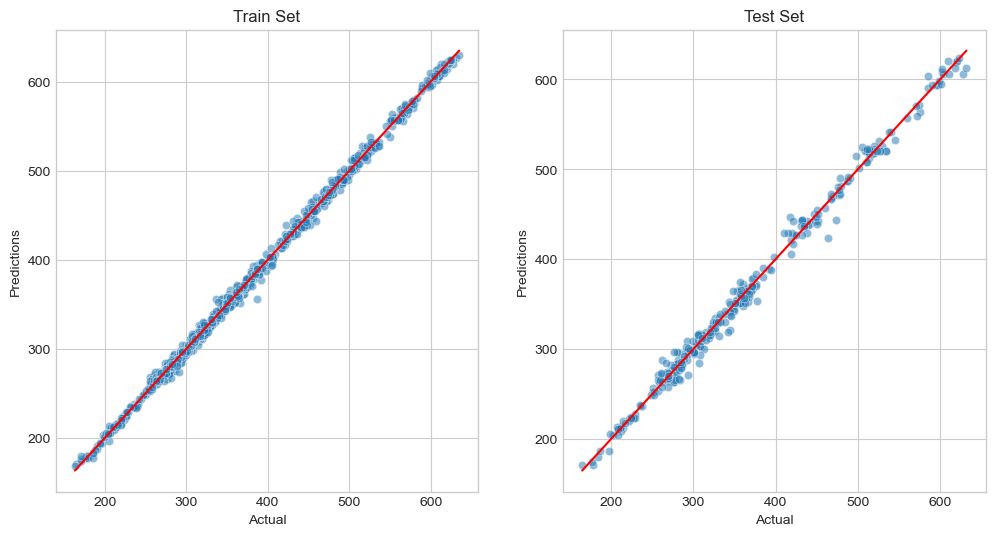

In [31]:
regression_performance(X_train, y_train, X_test, y_test,pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, 
                            pipeline, alpha_scatter=0.5)

In [32]:
print(f"Training on {len(X_train)} QQQ ETFs")
print(f"Testing on {len(X_test)} QQQ ETFs")

Training on 1204 QQQ ETFs
Testing on 302 QQQ ETFs


In [33]:
# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [34]:
y_pred

array([448.07157713, 431.06345536, 363.73048528, 309.81737196,
       202.94948143, 365.78616221, 256.97995093, 466.93131564,
       324.18255224, 306.68101786, 574.65408263, 294.80224399,
       338.4063681 , 299.72245605, 374.08804262, 304.84828067,
       214.70312928, 236.9185375 , 537.57540908, 336.76263444,
       619.72412388, 439.84349235, 592.38324173, 366.41944251,
       374.58273577, 537.50572172, 210.34077818, 268.380271  ,
       270.25585029, 369.83439809, 305.47195907, 315.39643867,
       289.53150232, 604.93626734, 228.03364932, 443.17355287,
       212.42202956, 512.44446991, 331.09410255, 289.50030462,
       193.02622341, 255.30438936, 506.19079923, 341.42611554,
       306.66480955, 323.57822985, 285.63938036, 276.80998857,
       535.75016496, 360.22296112, 510.86023183, 307.37836454,
       312.75421873, 273.027104  , 511.86425649, 353.8012095 ,
       514.42607099, 298.10461915, 591.9537271 , 337.37106547,
       412.06287236, 206.07994718, 277.52271388, 210.11

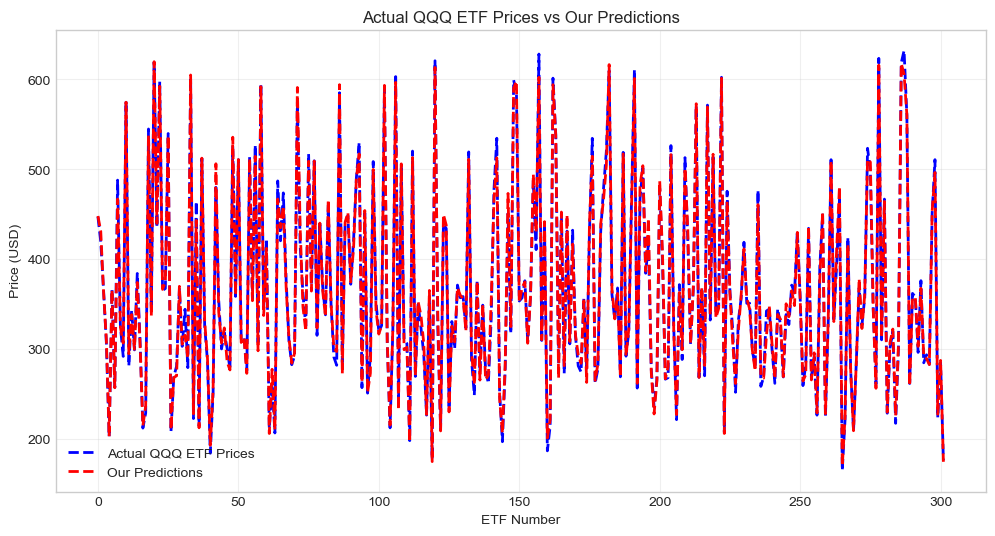

In [35]:
# Simple line plot - Actual vs Predicted
plt.figure(figsize=(12, 6))

# Plot both lines
x_axis = range(len(y_test))
plt.plot(x_axis, y_test.values, 'b--', label='Actual QQQ ETF Prices', linewidth=2)
plt.plot(x_axis, y_pred, 'r--', label='Our Predictions', linewidth=2)

plt.xlabel('ETF Number')
plt.ylabel('Price (USD)')
plt.title('Actual QQQ ETF Prices vs Our Predictions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [36]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("REGRESSION METRICS EXPLAINED:")
print("=" * 50)
print()
print("Mean Absolute Error (MAE)")
print(f"   Your MAE: ${mae:,.0f}")
print("   What it means: On average, our predictions are off by this much")
print("   Think of it as: The typical mistake we make")
print("   Goal: Lower is better!")
print()
print("R² Score (R-squared)")
print(f"   Your R²: {r2:.1%}")
print("   What it means: How much of the price variation we can explain")
print("   Think of it as: Our model's grade out of 100%")
print("   Goal: Higher is better (100% = perfect, 0% = terrible)")
print()
print("Quick Guide:")
print("   R² > 80% = Great!")
print("   R² 70-80% = Good")
print("   R² 60-70% = OK")
print("   R² < 60% = Needs improvement")

REGRESSION METRICS EXPLAINED:

Mean Absolute Error (MAE)
   Your MAE: $7
   What it means: On average, our predictions are off by this much
   Think of it as: The typical mistake we make
   Goal: Lower is better!

R² Score (R-squared)
   Your R²: 99.3%
   What it means: How much of the price variation we can explain
   Think of it as: Our model's grade out of 100%
   Goal: Higher is better (100% = perfect, 0% = terrible)

Quick Guide:
   R² > 80% = Great!
   R² 70-80% = Good
   R² 60-70% = OK
   R² < 60% = Needs improvement


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

def pipeline_adaboost_reg():
    pipeline = Pipeline([
        ("feat_scaling", StandardScaler()),
        ("feat_selection", SelectFromModel(RandomForestRegressor(random_state=101))),
        ("model", RandomForestRegressor(random_state=101)),
    ])
    return pipeline

In [38]:
pipe = pipeline_adaboost_reg()
pipe.fit(X_train, y_train)

# 1. Get the fitted selector and its mask
selector = pipe.named_steps["feat_selection"]
support_mask = selector.get_support()              # boolean array
selected_features = X_train.columns[support_mask]  # names of selected features

print("Selected features:", list(selected_features))

Selected features: ['GDP', 'CPI_Inflation', 'Average_price_of_electricity', 'Producer_Price_Index', 'Natural_Rate__of_Unemployment_(est.)', 'Real_Gross_Domestic_Product', 'Personal_Consumption_Expenditures', 'Core_CPI_(ex_Food/Energy)', 'Nonfarm_Payrolls', 'Monetary_Base', 'Moodys_BAA_Corporate_Bond_Yield', 'Capacity_Utilization:_Manufacturing']


In [39]:
pipe = pipeline_adaboost_reg()
pipe.fit(X_train, y_train)

Pipeline(steps=[('feat_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                ('model', RandomForestRegressor(random_state=101))])

In [40]:
selector = pipe.named_steps["feat_selection"]
support_mask = selector.get_support()              # boolean array
selected_features = X_train.columns[support_mask]  # names of selected features

print("Selected features:", list(selected_features))

Selected features: ['GDP', 'CPI_Inflation', 'Average_price_of_electricity', 'Producer_Price_Index', 'Natural_Rate__of_Unemployment_(est.)', 'Real_Gross_Domestic_Product', 'Personal_Consumption_Expenditures', 'Core_CPI_(ex_Food/Energy)', 'Nonfarm_Payrolls', 'Monetary_Base', 'Moodys_BAA_Corporate_Bond_Yield', 'Capacity_Utilization:_Manufacturing']


In [41]:
import numpy as np
import pandas as pd

rf = selector.estimator_                          # the fitted RandomForestRegressor
importances = rf.feature_importances_             # array aligned with original columns

feat_imp = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances,
})

# Sort and take top 15
feat_imp = feat_imp.sort_values("importance", ascending=False)
top15 = feat_imp.head(15).copy()

# Percentage of total importance
total_imp = feat_imp["importance"].sum()
top15["importance_pct"] = 100 * top15["importance"] / total_imp

print(top15)

                                      feature  importance  importance_pct
15                  Core_CPI_(ex_Food/Energy)    0.188920       18.892042
12          Personal_Consumption_Expenditures    0.130493       13.049278
34                              Monetary_Base    0.101117       10.111666
1                               CPI_Inflation    0.099579        9.957889
20                           Nonfarm_Payrolls    0.095848        9.584763
0                                         GDP    0.092684        9.268421
8        Natural_Rate__of_Unemployment_(est.)    0.078339        7.833898
3                Average_price_of_electricity    0.047433        4.743349
11                Real_Gross_Domestic_Product    0.045107        4.510690
42            Moodys_BAA_Corporate_Bond_Yield    0.023285        2.328524
43        Capacity_Utilization:_Manufacturing    0.021893        2.189348
6                        Producer_Price_Index    0.020694        2.069394
32                             M2_Mone

In [42]:
top15_names = set(top15["feature"])
selected_set = set(selected_features)

intersection = top15_names & selected_set
match_pct = 100 * len(intersection) / len(top15_names)

print("Overlap features:", intersection)
print("Match percentage:", match_pct)

Overlap features: {'Real_Gross_Domestic_Product', 'CPI_Inflation', 'Nonfarm_Payrolls', 'Natural_Rate__of_Unemployment_(est.)', 'Average_price_of_electricity', 'GDP', 'Core_CPI_(ex_Food/Energy)', 'Personal_Consumption_Expenditures', 'Monetary_Base', 'Moodys_BAA_Corporate_Bond_Yield', 'Capacity_Utilization:_Manufacturing', 'Producer_Price_Index'}
Match percentage: 80.0
